In [48]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
# Import any other packages you may want to use
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score

# 1. Data Preparation

In [51]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Intern2Grow task 2\dataset.csv")
print('df Shape:', df.shape)
df.head()

df Shape: (150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object

In [53]:
df['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# 2. Exploratory Data Analysis (EDA)

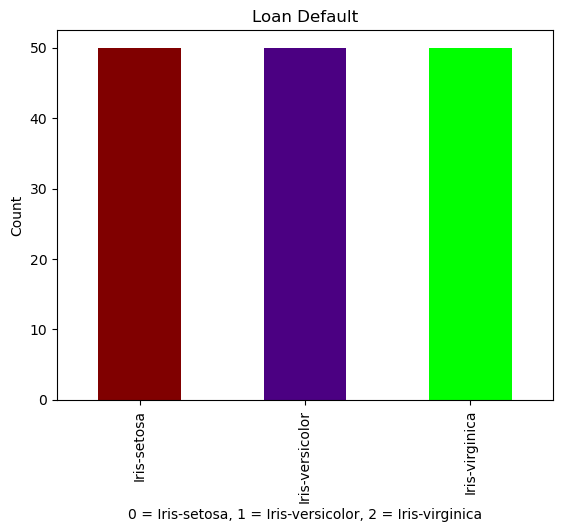

In [76]:
df["Class"].value_counts().plot(kind="bar", 
                                        color=["maroon", "indigo","lime"], title="Loan Default", 
                                        xlabel="0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica",
                                        ylabel="Count");

In [56]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(array([ 1.,  3.,  1.,  4.,  0.,  2.,  5.,  6., 10.,  0.,  9.,  4.,  1.,
         6.,  0.,  7.,  6.,  8.,  7.,  0.,  3.,  6.,  6.,  4.,  9.,  0.,
         7.,  5.,  2.,  0.,  8.,  3.,  4.,  1.,  1.,  0.,  3.,  1.,  1.,
         0.,  0.,  1.,  4.,  0.,  1.]),
 array([4.3 , 4.38, 4.46, 4.54, 4.62, 4.7 , 4.78, 4.86, 4.94, 5.02, 5.1 ,
        5.18, 5.26, 5.34, 5.42, 5.5 , 5.58, 5.66, 5.74, 5.82, 5.9 , 5.98,
        6.06, 6.14, 6.22, 6.3 , 6.38, 6.46, 6.54, 6.62, 6.7 , 6.78, 6.86,
        6.94, 7.02, 7.1 , 7.18, 7.26, 7.34, 7.42, 7.5 , 7.58, 7.66, 7.74,
        7.82, 7.9 ]),
 <BarContainer object of 45 artists>)

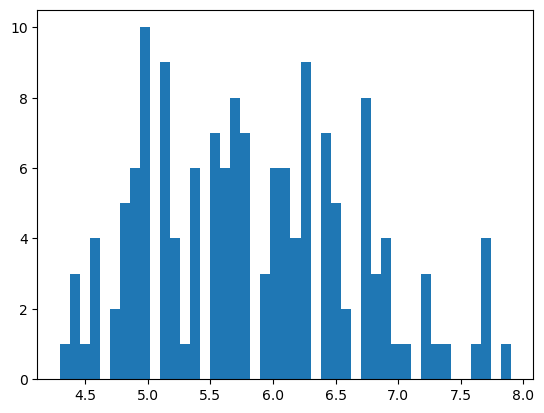

In [57]:
x = df['Sepal_Length']
plt.hist(x, bins=45)

(array([ 1.,  0.,  0.,  3.,  0.,  4.,  0.,  3.,  0.,  8.,  0.,  5.,  0.,
         9., 14.,  0., 10.,  0., 26.,  0., 12.,  0., 13.,  0.,  6.,  0.,
        12.,  0.,  6.,  3.,  0.,  3.,  0.,  6.,  0.,  2.,  0.,  1.,  0.,
         1.,  0.,  1.,  0.,  0.,  1.]),
 array([2.        , 2.05333333, 2.10666667, 2.16      , 2.21333333,
        2.26666667, 2.32      , 2.37333333, 2.42666667, 2.48      ,
        2.53333333, 2.58666667, 2.64      , 2.69333333, 2.74666667,
        2.8       , 2.85333333, 2.90666667, 2.96      , 3.01333333,
        3.06666667, 3.12      , 3.17333333, 3.22666667, 3.28      ,
        3.33333333, 3.38666667, 3.44      , 3.49333333, 3.54666667,
        3.6       , 3.65333333, 3.70666667, 3.76      , 3.81333333,
        3.86666667, 3.92      , 3.97333333, 4.02666667, 4.08      ,
        4.13333333, 4.18666667, 4.24      , 4.29333333, 4.34666667,
        4.4       ]),
 <BarContainer object of 45 artists>)

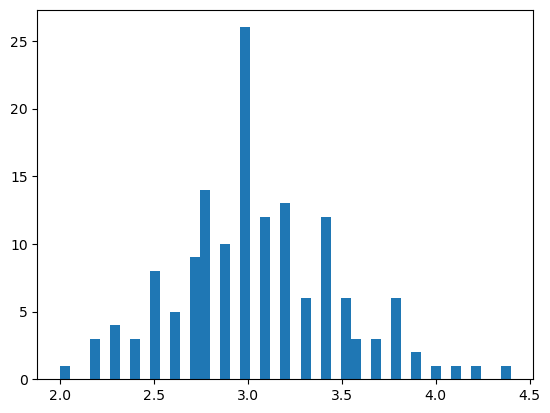

In [58]:
x = df['Sepal_Width']
plt.hist(x, bins=45)

(array([ 2.,  2.,  7., 26.,  7.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  2.,  0.,  3.,  1.,  1.,  8.,  3.,  4.,  6.,
         8.,  3.,  9.,  5.,  4.,  8.,  4.,  2.,  3.,  9.,  3.,  2.,  5.,
         0.,  1.,  1.,  1.,  2.,  1.]),
 array([1.        , 1.13111111, 1.26222222, 1.39333333, 1.52444444,
        1.65555556, 1.78666667, 1.91777778, 2.04888889, 2.18      ,
        2.31111111, 2.44222222, 2.57333333, 2.70444444, 2.83555556,
        2.96666667, 3.09777778, 3.22888889, 3.36      , 3.49111111,
        3.62222222, 3.75333333, 3.88444444, 4.01555556, 4.14666667,
        4.27777778, 4.40888889, 4.54      , 4.67111111, 4.80222222,
        4.93333333, 5.06444444, 5.19555556, 5.32666667, 5.45777778,
        5.58888889, 5.72      , 5.85111111, 5.98222222, 6.11333333,
        6.24444444, 6.37555556, 6.50666667, 6.63777778, 6.76888889,
        6.9       ]),
 <BarContainer object of 45 artists>)

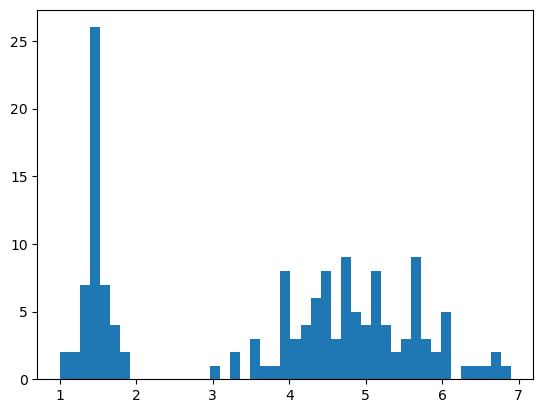

In [59]:
x = df['Petal_Length']
plt.hist(x, bins=45)

(array([ 6., 28.,  0.,  7.,  0.,  7.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  7.,  0.,  3.,  0.,  5.,  0., 13.,  0.,  8.,  0.,
        12.,  0.,  4.,  0.,  2., 12.,  0.,  5.,  0.,  6.,  0.,  6.,  0.,
         3.,  0.,  8.,  0.,  3.,  3.]),
 array([0.1       , 0.15333333, 0.20666667, 0.26      , 0.31333333,
        0.36666667, 0.42      , 0.47333333, 0.52666667, 0.58      ,
        0.63333333, 0.68666667, 0.74      , 0.79333333, 0.84666667,
        0.9       , 0.95333333, 1.00666667, 1.06      , 1.11333333,
        1.16666667, 1.22      , 1.27333333, 1.32666667, 1.38      ,
        1.43333333, 1.48666667, 1.54      , 1.59333333, 1.64666667,
        1.7       , 1.75333333, 1.80666667, 1.86      , 1.91333333,
        1.96666667, 2.02      , 2.07333333, 2.12666667, 2.18      ,
        2.23333333, 2.28666667, 2.34      , 2.39333333, 2.44666667,
        2.5       ]),
 <BarContainer object of 45 artists>)

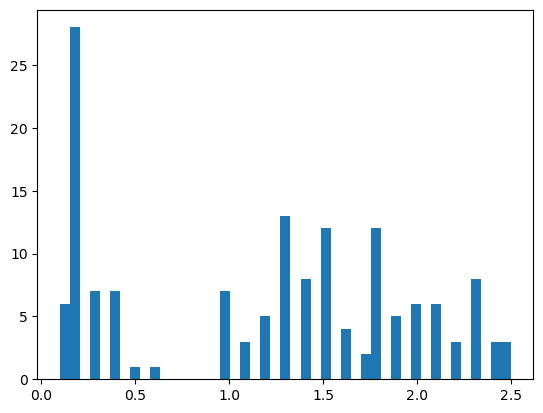

In [60]:
x = df['Petal_Width']
plt.hist(x, bins=45)

#### Based on the histograms, it seems that the features have different ranges. Therefore, normalization is needed

In [62]:
from sklearn.preprocessing import MinMaxScaler

# features to standardize
features = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

scaler = MinMaxScaler()

df[features] = scaler.fit_transform(df[features])

df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [78]:
# label encoding target vairable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Class_encoded'] = label_encoder.fit_transform(df['Class'])

# Display the first few rows to verify the encoding
print(df[['Class', 'Class_encoded']].head())

         Class  Class_encoded
0  Iris-setosa              0
1  Iris-setosa              0
2  Iris-setosa              0
3  Iris-setosa              0
4  Iris-setosa              0


# 3. Feature Selection

In [87]:
#  feature
x = df.drop(["Class","Class_encoded"], axis=1)
# target
y = df['Class']

# 4. Model Selection an Training

#### Since the target variable is categorical and there are more than one model to use for classification, we will test out KNN, Decision Tree, SVM, Logistic Regression and Random Forest

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay


In [103]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [105]:
#use parameters
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

### Logistic Regression

In [109]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv = 10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [130]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [132]:
y_pred=logreg_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



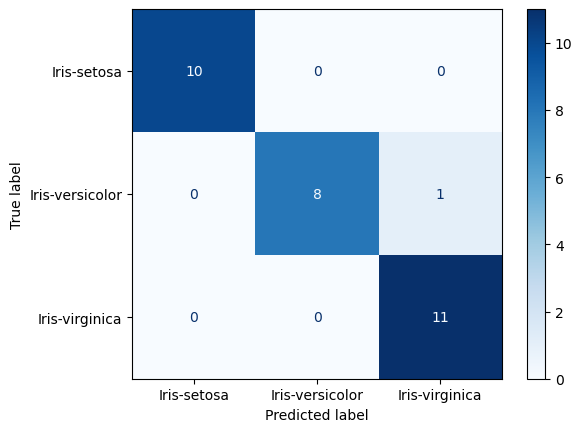

In [143]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_cv.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### SVM

In [148]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [150]:
svm_cv = GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [152]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}


In [156]:
y_pred_2=svm_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_2)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_2))

Accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



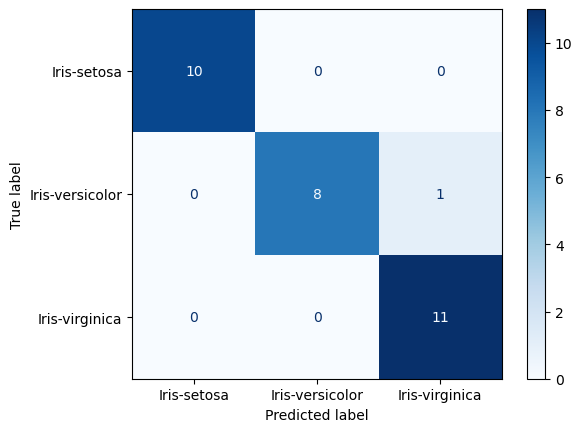

In [172]:
cm2 = confusion_matrix(y_test, y_pred_2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=svm_cv.classes_)
disp2.plot(cmap=plt.cm.Blues)
plt.show()

### Decision Tree

In [164]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [166]:
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [168]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


In [170]:
y_pred_3=tree_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_3)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_3))

Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



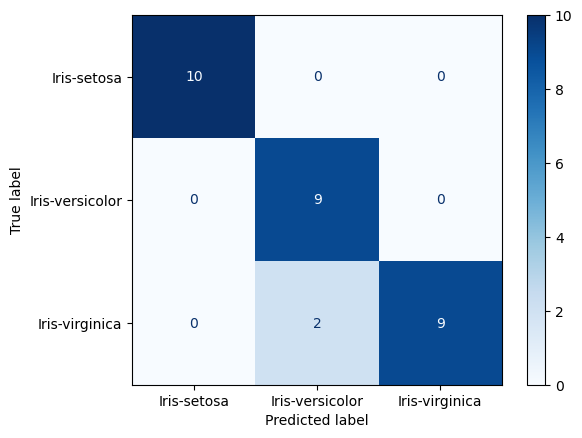

In [174]:
cm3 = confusion_matrix(y_test, y_pred_3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=tree_cv.classes_)
disp3.plot(cmap=plt.cm.Blues)
plt.show()

### KNN

In [177]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [181]:
knn_cv = GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [183]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 2}


In [185]:
y_pred_4=knn_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_4)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_4))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



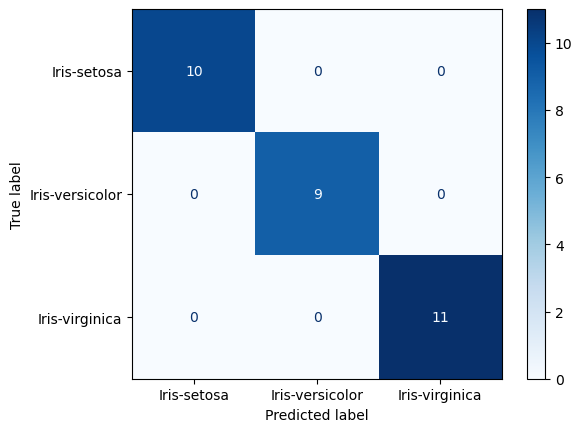

In [187]:
cm4 = confusion_matrix(y_test, y_pred_4)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=knn_cv.classes_)
disp4.plot(cmap=plt.cm.Blues)
plt.show()

In [196]:
parameters = {
    'max_depth': [3,5],
    'n_estimators': [100, 200],
    'max_features': [10, 20],
    'min_samples_leaf': [1, 2]
}
rf_classifier = RandomForestClassifier()

In [198]:
rf_cv = GridSearchCV(rf_classifier,parameters,cv=10)
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'max_features': [10, 20],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200]})

In [200]:
print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 100}


In [202]:
y_pred_5=rf_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_5)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_5))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



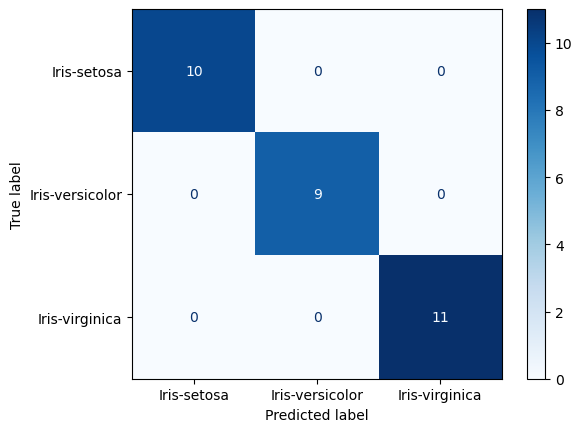

In [204]:
cm5 = confusion_matrix(y_test, y_pred_5)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=knn_cv.classes_)
disp5.plot(cmap=plt.cm.Blues)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Random Forest')])

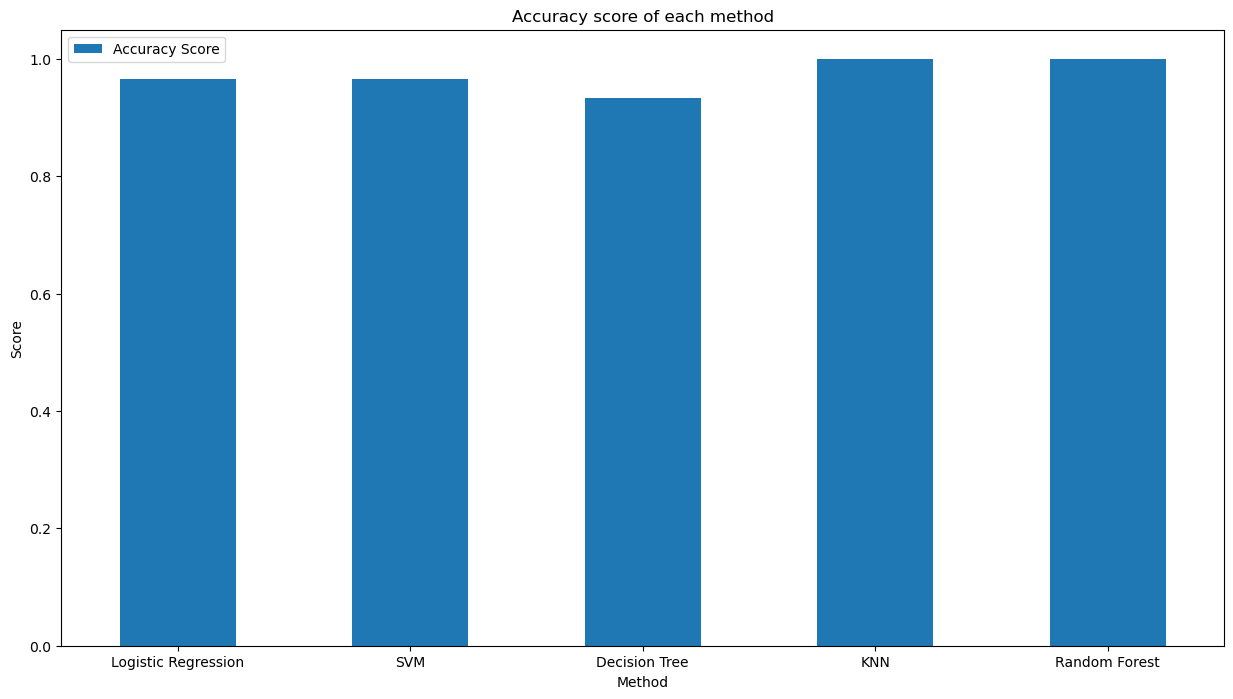

In [234]:
Report = pd.DataFrame({'Method':['Log_Reg','SVM','Decision Tree','KNN','Random Forest'],
                     'Accuracy Score': [logreg_cv.score(X_test,y_test),svm_cv.score(X_test,y_test),tree_cv.score(X_test,y_test),knn_cv.score(X_test,y_test),rf_cv.score(X_test,y_test)]},
                     index = ['Logistic Regression','SVM','Decision Tree','KNN','Random Forest'])

Report.plot(kind = 'bar', figsize=(15,8))
plt.title("Accuracy score of each method")
plt.xlabel("Method")
plt.ylabel("Score")
plt.xticks(rotation = 0)

### Based on the bar graph, this concludes that KNN and Random Forest, with hyperparameter tuning and GridSearchCV, performed the best